Import all Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Replace the base path with the actual path of your dataset

In [ ]:
base_path = '/content/drive/MyDrive/ML Lab final/Qn1'

Directory paths


In [ ]:
train_dir = base_path + '/train'
test_dir = base_path + '/test'
validate_dir = base_path + '/val'

Image Data Generators

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validate_datagen = ImageDataGenerator(rescale=1./255)

Constants

In [ ]:
batch_size = 32
img_height, img_width = 150, 150

Generators for training, testing, and validation data

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5226 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [ ]:
validate_generator = validate_datagen.flow_from_directory(
    validate_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


Found 16 images belonging to 2 classes.


Building the CNN model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validate_generator
)

Epoch 1/10
164/164 [==============================] - 1240s 7s/step - loss: 0.2663 - accuracy: 0.9039 - val_loss: 0.6939 - val_accuracy: 0.6250
Epoch 2/10
164/164 [==============================] - 322s 2s/step - loss: 0.0967 - accuracy: 0.9656 - val_loss: 0.0546 - val_accuracy: 1.0000
Epoch 3/10
164/164 [==============================] - 329s 2s/step - loss: 0.0854 - accuracy: 0.9703 - val_loss: 0.1941 - val_accuracy: 0.9375
Epoch 4/10
164/164 [==============================] - 325s 2s/step - loss: 0.0563 - accuracy: 0.9812 - val_loss: 0.0916 - val_accuracy: 0.9375
Epoch 5/10
164/164 [==============================] - 332s 2s/step - loss: 0.0422 - accuracy: 0.9851 - val_loss: 0.3439 - val_accuracy: 0.8125
Epoch 6/10
164/164 [==============================] - 328s 2s/step - loss: 0.0373 - accuracy: 0.9862 - val_loss: 0.0887 - val_accuracy: 0.9375
Epoch 7/10
164/164 [==============================] - 323s 2s/step - loss: 0.0310 - accuracy: 0.9897 - val_loss: 0.2043 - val_accuracy: 0.937

In [13]:
test_loss, test_acc = model.evaluate(test_generator)


20/20 [==============================] - 179s 9s/step - loss: 2.7756 - accuracy: 0.7500


Plotting accuracy over epochs


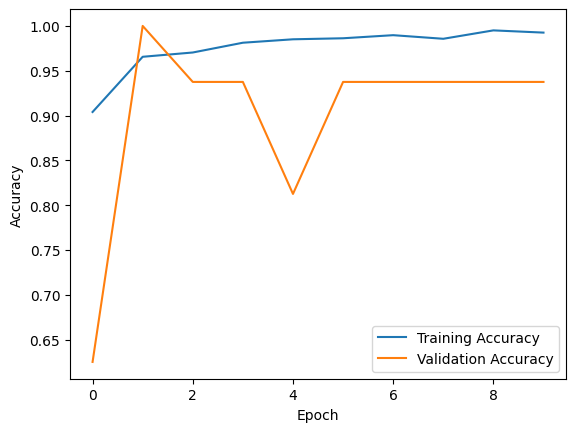

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Plotting loss over epochs

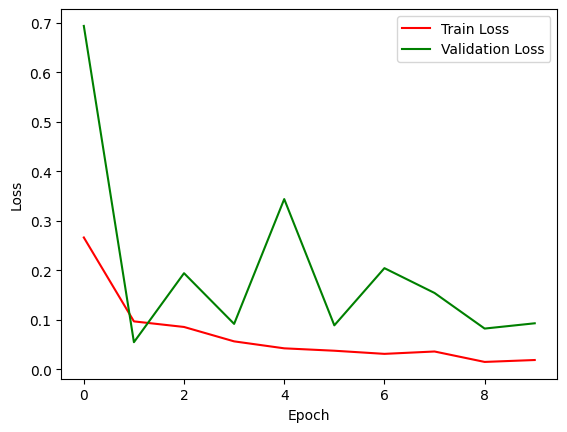

In [15]:
plt.plot(history.history['loss'], color='red', label='Train Loss')
plt.plot(history.history['val_loss'], color='green', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()